# Kaggle - Breast Cancer

BitTiger DS501 Capstone <br>
by Hang Su

## 项目目标：
- Utilize various tools to clean and explore data.
- Apply different models in this binary classification problems and improve performance by designed metrics.

## Load data and browse data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

% matplotlib inline
# Always make it pretty.
plt.style.use('ggplot')

In [2]:
# Load data from file
df = pd.read_csv('data/BC data.csv')

In [3]:
# Browse dataset
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
# Show summary stats
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Build Logistic Regression Model

### Define Features and Target

In [5]:
selected_features = ['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean', \
                     'compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean',\
                     'radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se',\
                     'concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst',\
                     'area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst',\
                     'symmetry_worst','fractal_dimension_worst']
target = 'diagnosis'
#u means unicode in case for other languages

In [6]:
X = df[selected_features].values

In [7]:
X.shape

(569, 30)

In [17]:
# change 'M' and 'B' to binary
binary=[]
for i in range(len(y)):
    if df['diagnosis'][i]=='M':
        binary.append(1)
    else:
        binary.append(0)
df['diagnosis']=binary

In [18]:
y = df['diagnosis'].values

In [40]:
sum(y)

212

#### Let's Train-test split the data!

In [19]:
# import train test split function from sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Logistic Regression model using sklearn

In [20]:
# Import logistic regression from sklearn
from sklearn.linear_model import LogisticRegression

# Initialize model by providing parameters
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(C=1.0, penalty='l1')

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

### Calculate the metric scores for the model

In [21]:
# Import metrics functions from sklearn
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score, roc_auc_score

In [22]:
import pandas as pd
# Helper method to print metric scores    
def get_performance_metrics(y_train, y_train_pred, y_test, y_test_pred, threshold=0.5):
    metric_names = ['AUC','Accuracy','Precision','Recall','f1-score']
    metric_values_train = [roc_auc_score(y_train, y_train_pred),
                    accuracy_score(y_train, y_train_pred>threshold),
                    precision_score(y_train, y_train_pred>threshold),
                    recall_score(y_train, y_train_pred>threshold),
                    f1_score(y_train, y_train_pred>threshold)
                   ]
    metric_values_test = [roc_auc_score(y_test, y_test_pred),
                    accuracy_score(y_test, y_test_pred>threshold),
                    precision_score(y_test, y_test_pred>threshold),
                    recall_score(y_test, y_test_pred>threshold),
                    f1_score(y_test, y_test_pred>threshold)
                   ]
    all_metrics = pd.DataFrame({'metrics':metric_names,
                                'train':metric_values_train,
                                'test':metric_values_test},columns=['metrics','train','test']).set_index('metrics')
    print(all_metrics)

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_train, y_train_pred, y_test, y_test_pred):
    roc_auc_train = roc_auc_score(y_train, y_train_pred)
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)

    roc_auc_test = roc_auc_score(y_test, y_test_pred)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
    plt.figure()
    lw = 2
    plt.plot(fpr_train, tpr_train, color='green',
             lw=lw, label='ROC Train (AUC = %0.4f)' % roc_auc_train)
    plt.plot(fpr_test, tpr_test, color='darkorange',
             lw=lw, label='ROC Test (AUC = %0.4f)' % roc_auc_test)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

              train      test
metrics                      
AUC        0.994629  0.995872
Accuracy   0.962637  0.956140
Precision  0.956790  0.920000
Recall     0.939394  0.978723
f1-score   0.948012  0.948454


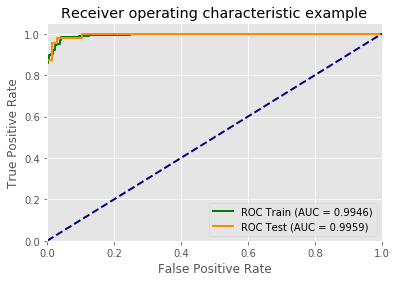

In [24]:
# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

### Understanding the Estimated Coefficients

In [32]:
df_coeffs = pd.DataFrame(list(zip(selected_features, clf.coef_.flatten()))).sort_values(by=[1], ascending=False)
df_coeffs.columns = ['feature', 'coeff']
df_coeffs=df_coeffs[df_coeffs.coeff!=0]
df_coeffs

,feature,coeff
26,concavity_worst,3.602226
21,texture_worst,0.285871
22,perimeter_worst,0.192647
13,area_se,0.096121
2,perimeter_mean,0.047074
23,area_worst,0.017264
3,area_mean,0.013814
1,texture_mean,-0.056297
20,radius_worst,-0.635721
11,texture_se,-0.930153


In [43]:
df_coeffs['feature']
# df_coeffs.shape[1]

26    concavity_worst
21      texture_worst
22    perimeter_worst
13            area_se
2      perimeter_mean
23         area_worst
3           area_mean
1        texture_mean
20       radius_worst
11         texture_se
0         radius_mean
Name: feature, dtype: object

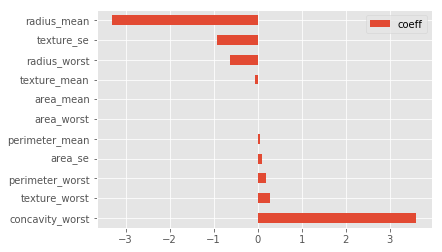

In [42]:
ax = df_coeffs.plot.barh()
t = np.arange(df_coeffs.shape[0])
ax.set_yticks(t)
ax.set_yticklabels(df_coeffs['feature'])
plt.show()

### Bagging

#### Single Tree

              train      test
metrics                      
AUC        0.992027  0.993172
Accuracy   0.951648  0.964912
Precision  0.967320  0.977778
Recall     0.896970  0.936170
f1-score   0.930818  0.956522


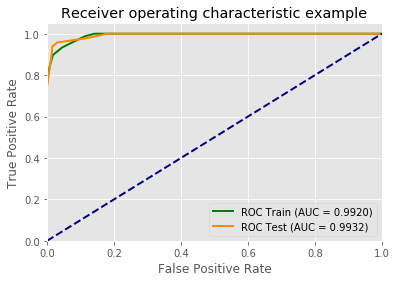

In [34]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Make prediction on the training data
y_train_pred = clf.predict(X_train)
p_train_pred = clf.predict_proba(X_train)[:,1]

# Make predictions on test data
y_test_pred = clf.predict(X_test)
p_test_pred = clf.predict_proba(X_test)[:,1]

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

In [26]:
# define function to perform train, test, and get model performance
def train_test_model(clf, X_train, y_train, X_test, y_test):
    # Fit a model by providing X and y from training set
    clf.fit(X_train, y_train)

    # Make prediction on the training data
    y_train_pred = clf.predict(X_train)
    p_train_pred = clf.predict_proba(X_train)[:,1]

    # Make predictions on test data
    y_test_pred = clf.predict(X_test)
    p_test_pred = clf.predict_proba(X_test)[:,1]

    # print model results
    get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
    plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)


#### Bagged Trees

              train      test
metrics                      
AUC        0.995569  0.996824
Accuracy   0.964835  0.964912
Precision  0.957055  0.957447
Recall     0.945455  0.957447
f1-score   0.951220  0.957447


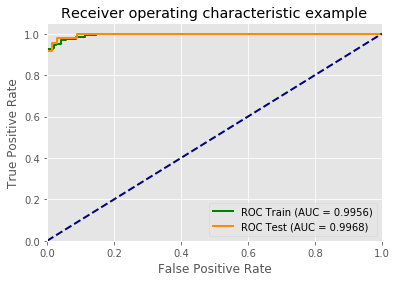

In [36]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html 
from sklearn.ensemble import BaggingClassifier

base_classifier = DecisionTreeClassifier(max_depth=20,min_samples_leaf=10)

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 50,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

#### Single KNN

              train      test
metrics                      
AUC        0.994828  0.953477
Accuracy   0.960440  0.912281
Precision  0.968153  0.877551
Recall     0.921212  0.914894
f1-score   0.944099  0.895833


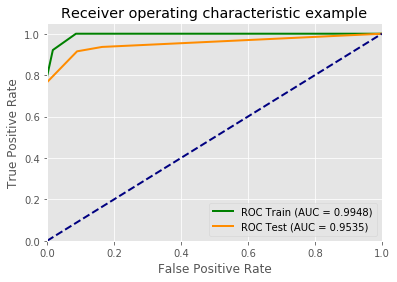

In [44]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {
    #'weights':'distance',
    'n_neighbors':3,
    'leaf_size':10
}
base_classifier = KNeighborsClassifier(**parameters)
clf = base_classifier

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

#### Bagged KNN

              train      test
metrics                      
AUC        0.996468  0.961893
Accuracy   0.962637  0.921053
Precision  0.974359  0.895833
Recall     0.921212  0.914894
f1-score   0.947040  0.905263


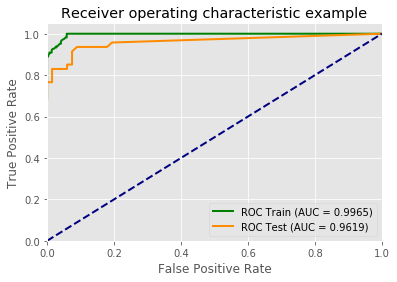

In [45]:
from sklearn.ensemble import BaggingClassifier

# Choose some parameter combinations to try
parameters = {
              'base_estimator':base_classifier,
              'n_estimators': 30,
              'n_jobs': -1
              }

clf = BaggingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Random Forest

              train      test
metrics                      
AUC        0.995841  0.994919
Accuracy   0.971429  0.964912
Precision  0.969136  0.957447
Recall     0.951515  0.957447
f1-score   0.960245  0.957447


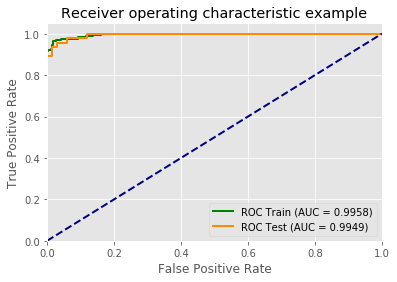

In [27]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

# Choose some parameter combinations to try
parameters = {'n_estimators': 100,
             # 'max_features': 'auto',
             # 'criterion': 'gini',
             # 'max_depth': 20,
             # 'min_samples_split': 2,
              'min_samples_leaf': 10,
              'random_state': 0,
              'n_jobs': -1
              }

clf = RandomForestClassifier(**parameters)

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

In [35]:
clf.feature_importances_

array([4.00627308e-02, 1.10699778e-02, 6.08641109e-02, 4.09437631e-02,
       2.68188921e-03, 8.40592578e-03, 9.13221804e-02, 9.71545009e-02,
       9.47979459e-05, 1.26741717e-03, 2.14326928e-02, 4.82470892e-04,
       8.05968765e-03, 3.21870021e-02, 6.18585282e-04, 6.85396397e-04,
       7.04369279e-04, 3.95613873e-03, 1.43206031e-03, 1.56515527e-03,
       1.17473819e-01, 5.38758181e-03, 1.90106747e-01, 5.72595645e-02,
       2.98422242e-03, 9.08552162e-03, 1.96394074e-02, 1.58570715e-01,
       5.86288803e-03, 8.63867977e-03])

In [39]:
clf.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=209652396, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=398764591, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=2,
             min_w

### Gradient Boosting Trees

           train      test
metrics                   
AUC          1.0  0.993014
Accuracy     1.0  0.929825
Precision    1.0  0.882353
Recall       1.0  0.957447
f1-score     1.0  0.918367


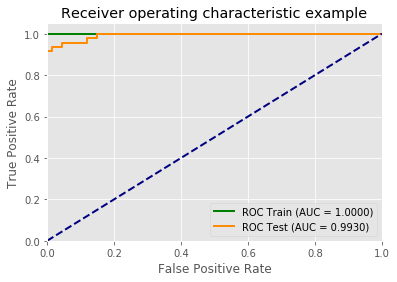

In [47]:
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
from sklearn.ensemble import GradientBoostingClassifier

# Choose some parameter combinations to try
parameters = {
    'n_estimators': 50,
    'max_depth': 5,
    'learning_rate': 0.2,
    'random_state': 42
}

# parameters = {
#     'n_estimators': 50,
#     'max_depth': 5,
#     'learning_rate': 0.2,
#     'subsample': 0.7,
#     'max_features':0.8,
#     'random_state': 42
# }

clf = GradientBoostingClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### Neural Network

              train      test
metrics                      
AUC        0.787106  0.767545
Accuracy   0.694505  0.622807
Precision  1.000000  1.000000
Recall     0.157576  0.085106
f1-score   0.272251  0.156863


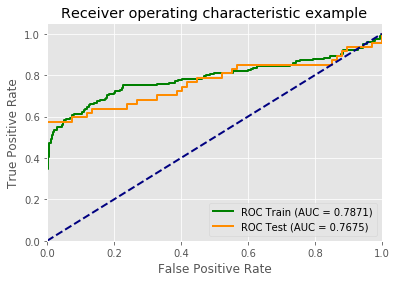

In [48]:
# http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier
from sklearn.neural_network import MLPClassifier

# Choose some parameter combinations to try
parameters = {
    'solver':'adam', 
    'activation':'relu',
    'alpha':1e-5, #increase alpha->increase penalty :: http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py
    'hidden_layer_sizes':(5,5), 
    'learning_rate':'adaptive',
    'random_state':1
    }
clf = MLPClassifier(**parameters)

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### SVM

#### Linear SVM

              train      test
metrics                      
AUC        0.878370  0.925532
Accuracy   0.909890  0.938596
Precision  0.984375  1.000000
Recall     0.763636  0.851064
f1-score   0.860068  0.919540


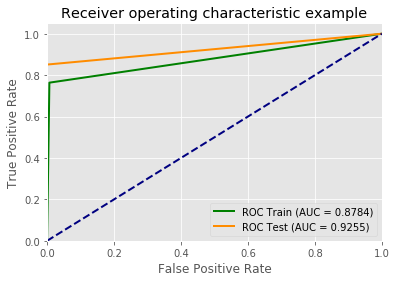

In [49]:
from sklearn.svm import LinearSVC

# Choose some parameter combinations to try
clf = LinearSVC()

# Fit a model by providing X and y from training set
clf.fit(X_train, y_train)

# No predict_proba for LinearSVC

# Make prediction on the training data
p_train_pred = clf.predict(X_train)

# Make predictions on test data
p_test_pred = clf.predict(X_test)

# print model results
get_performance_metrics(y_train, p_train_pred, y_test, p_test_pred)
plot_roc_curve(y_train, p_train_pred, y_test, p_test_pred)

#### NonLinear SVM

           train      test
metrics                   
AUC          1.0  0.898063
Accuracy     1.0  0.587719
Precision    1.0  0.000000
Recall       1.0  0.000000
f1-score     1.0  0.000000


C:\Users\suh10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\suh10\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


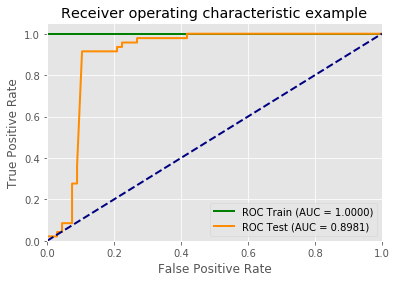

In [50]:
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC

# Choose some parameter combinations to try
parameters = {
    'probability':True, # get simulated probability
    'max_iter':2000
    }
clf = SVC(**parameters)    

# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)

### HyperParameter Tuning: Grid Search

In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score
from sklearn.model_selection import GridSearchCV

# Choose the type of classifier. 
clf = RandomForestClassifier()

# Choose some parameter combinations to try
param_grid = {'n_estimators': [100,200], 
              'max_features': ['auto'], 
              'criterion': ['gini'],
              'max_depth': [15,20,25], 
              'min_samples_split': [2],
              'min_samples_leaf': [2,10,20],
              'n_jobs':[-1]
             }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(roc_auc_score)

# Run the grid search
# read theory
grid_obj = GridSearchCV(clf, param_grid, cv=5, scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

              train      test
metrics                      
AUC        0.999833  0.997460
Accuracy   0.993407  0.982456
Precision  1.000000  0.978723
Recall     0.981818  0.978723
f1-score   0.990826  0.978723


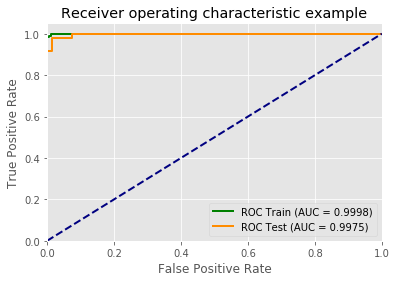

In [52]:
# Train test model
train_test_model(clf, X_train, y_train, X_test, y_test)